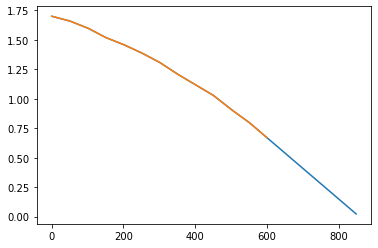

In [25]:
# motor torque calculations for stepper drive
import numpy as np
import matplotlib.pyplot as pp
import scipy.interpolate
import math

w = np.arange(0, 650, 50)
#Md = [1.57, 1.57, 1.50, 1.43, 1.35, 1.15, 0.98, 0.85, 0.72, 0.60, 0.54, 0.50, 0.45] #for X25
Md = [1.7, 1.66, 1.6, 1.52, 1.46, 1.39, 1.31, 1.21, 1.12, 1.03, 0.91, 0.80, 0.67]

wi = np.arange(0,850,1)
fMd_i = scipy.interpolate.interp1d(w, Md, fill_value="extrapolate")
Md_i = fMd_i(wi)

pp.plot(wi, Md_i)
pp.plot(w, Md)
pp.show()

In [26]:
#torsion pendulum experiment on 3/28/20 with CB550F pointer
m = 0.0015 #mass of pointer, kg
g = 9.81   #gravitational acceleration constant, m/s^2
D = 0.035  #distance between strings, m
T = 19./60 #time constant, s, as measured
L = 0.398  #length of pendulum, m
JL = m*g*D**2*T**2/(16*math.pi**2*L) #pointer rotational inertia, kg*m^2
JMS = 610e-9 #stepper gearset rotational inertia, kg*m^2
J = JL+JMS #total rotational inertia
print(J)

6.387606208045071e-07


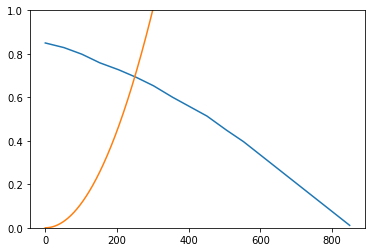

In [27]:
Malpha = 1000*J*np.power(wi,2)*math.pi/180
fos = 0.5 #safety factor on torque -- doesn't translate linearly to speed
pp.plot(wi, Md_i*fos)
pp.plot(wi, Malpha)
pp.ylim((0, 1.0))
pp.show()

In [28]:
fss_idx = np.argwhere(np.diff(np.sign(Md_i*fos-Malpha))).flatten()[0]
fss = wi[fss_idx]
print("Fss: %iHz" % fss)

Fss: 249Hz


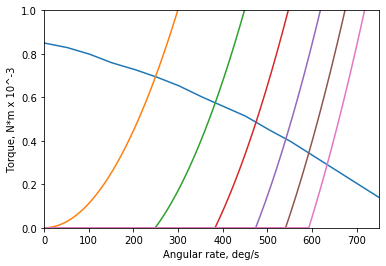

[  0 249 383 474 541 593 634]


In [39]:
#this will get us FULL STEP delays, but what about third-step delays?
nsteps = 5
stepsize = 1 #steps per FSS

fz = np.array((0, fss,))
pp.plot(wi, Md_i*fos)
pp.plot(wi, Malpha)
pp.xlim((0,750))
pp.ylim((0,1.0))
pp.xlabel("Angular rate, deg/s")
pp.ylabel("Torque, N*m x 10^-3")

for i in range(nsteps):
    Ma_l = 1000*J*wi*np.clip((wi-fz[-1])*stepsize,0,np.max(wi))*math.pi/180.
    pp.plot(wi, Ma_l)
    fz_idx = np.argwhere(np.diff(np.sign(Md_i*fos-Ma_l))).flatten()[0]
    fz = np.append(fz, wi[fz_idx])

pp.show()
print(fz)

In [44]:
#now get timer periods
#remember, a full step is THREE commutation steps!

partsteps=np.linspace(0, len(fz)-1, len(fz)*3)
ffz_i = scipy.interpolate.interp1d(np.arange(0,len(fz),1), fz)
fz_i = ffz_i(partsteps)

timerfreq = 64e6
prescaler = 5
tickrate = timerfreq/prescaler
print("Timer tick rate: %.1fMHz" % (tickrate/1e6))

#rate_steps = np.repeat(tickrate / fz[1:], 3)
rate_steps = tickrate/fz_i[1:]/3 #div by 3 bc these are third-steps

print("{" + ", ".join(["%i" % i for i in rate_steps]) + "}")
print(len(rate_steps))

Timer tick rate: 12.8MHz
{57117, 28558, 19039, 15470, 13502, 11978, 10881, 10173, 9551, 9001, 8635, 8297, 7985, 7737, 7524, 7323, 7145, 7001, 6862, 6729}
20
